In [211]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [212]:
data = pd.read_excel('Mpg_data.xlsx', sheet_name='auto-mpg', usecols=['mpg', 'cylinders',	'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])
df = pd.DataFrame(data)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,180,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,150,8,3500,165.0,3693,115,70,1,buick skylark 320
2,180,8,3180,150.0,3436,110,70,1,plymouth satellite
3,160,8,3040,150.0,3433,120,70,1,amc rebel sst
4,170,8,3020,140.0,3449,105,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,270,4,1400,86.00,2790,156,82,1,ford mustang gl
394,440,4,9700,52.00,2130,246,82,2,vw pickup
395,320,4,1350,84.00,2295,116,82,1,dodge rampage
396,280,4,1200,79.00,2625,186,82,1,ford ranger


In [213]:
# remove acceleration data with value more than 500
df.drop(df[df['acceleration'] > 500].index, inplace = True)

In [214]:
# replacing '?' value with NaN
df['horsepower'].replace('?', np.NaN, inplace = True)
# create a variable for horsepower data frame
hp_df = df['horsepower']
# changing horsepower data type type to float
hp_df = hp_df.astype(float)
# get most frequent value
horse_value, horse_counts = np.unique(hp_df, return_counts = True)
# replacing horsepower data with horse power most frequent data
df['horsepower'].replace(np.NaN, horse_value[horse_counts.argmax()], inplace = True)
# changing horsepower data type type to float
df['horsepower'] = df['horsepower'].astype(float)

In [215]:
# linear regression
regress = LinearRegression()
y = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
x = df[['mpg']]
regress.fit(x, y)

LinearRegression()

In [216]:
# getting linear regression value
r_score = regress.score(x, y)
y_pred = pd.DataFrame(regress.predict(x))
# print predicted acceleration data
y_pred.rename(columns = {0 : "cylinders", 1: "displacement", 2 : "horsepower", 3 : "weight", 4 : "acceleration", 5 : "model year", 6 : "origin"}, inplace = True)
y_pred = y_pred.astype(int)
y_pred

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,6,3038,125,3464,147,74,1
1,6,2566,136,3734,143,73,1
2,6,3038,125,3464,147,74,1
3,6,2723,132,3644,144,73,1
4,6,2881,128,3554,146,74,1
...,...,...,...,...,...,...,...
392,4,4452,92,2655,160,76,1
393,2,7123,29,1126,185,81,2
394,4,5237,73,2205,168,78,2
395,4,4609,88,2565,162,77,1


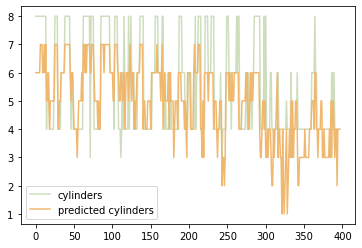

In [217]:
# plot between cylinders base data and cylinders predicted data
plt.plot(y['cylinders'], label = "cylinders", color = '#CEDEBD')
plt.plot(y_pred['cylinders'], label = "predicted cylinders", color = '#F0B86E')
plt.legend()
plt.show()

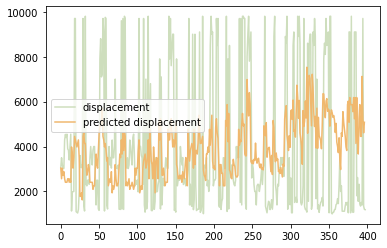

In [218]:
# plot between displacement base data and displacement predicted data
plt.plot(y['displacement'], label = "displacement", color = '#CEDEBD')
plt.plot(y_pred['displacement'], label = "predicted displacement", color = '#F0B86E')
plt.legend()
plt.show()

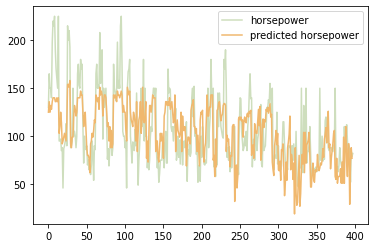

In [219]:
# plot between horsepower base data and horsepower predicted data
plt.plot(y['horsepower'], label = "horsepower", color = '#CEDEBD')
plt.plot(y_pred['horsepower'], label = "predicted horsepower", color = '#F0B86E')
plt.legend()
plt.show()

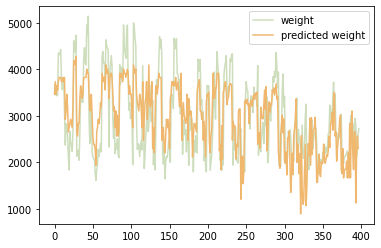

In [220]:
# plot between weight base data and weight predicted data
plt.plot(y['weight'], label = "weight", color = '#CEDEBD')
plt.plot(y_pred['weight'], label = "predicted weight", color = '#F0B86E')
plt.legend()
plt.show()

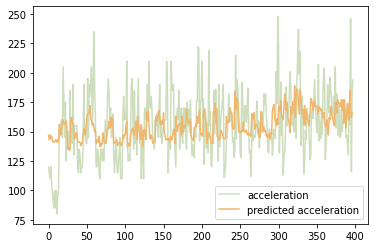

In [221]:
# plot between acceleration base data and acceleration predicted data
plt.plot(y['acceleration'], label = "acceleration", color = '#CEDEBD')
plt.plot(y_pred['acceleration'], label = "predicted acceleration", color = '#F0B86E')
plt.legend()
plt.show()

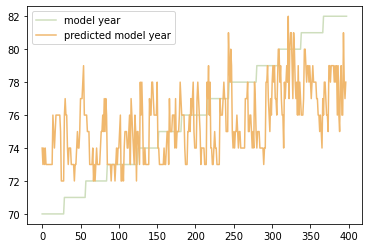

In [222]:
# plot between model year base data and model year predicted data
plt.plot(y['model year'], label = "model year", color = '#CEDEBD')
plt.plot(y_pred['model year'], label = "predicted model year", color = '#F0B86E')
plt.legend()
plt.show()

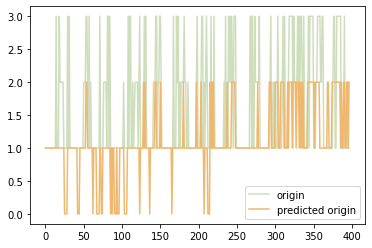

In [223]:
# plot between origin base data and origin predicted data
plt.plot(y['origin'], label = "origin", color = '#CEDEBD')
plt.plot(y_pred['origin'], label = "predicted origin", color = '#F0B86E')
plt.legend()
plt.show()